In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [2]:
df=pd.read_excel("/content/drive/MyDrive/Dataset/Preprocessed_data.xlsx")

In [3]:
df.head()

,System Code,Latitude,Longitude,Road Description,Road Condition,Lighting Conditions,Weather Condition,Alcohol Suspected,Speed Limit Category,Rush Hour,Severity
0,State Highway,39.52549,-107.32253,Intersection Related,Snowy,Daylight,Snow,No,Low,0,slight
1,City Street,39.82885,-105.04402,Non-Intersection,Dry,Dark – Unlighted,Clear,No,Low,0,slight
2,City Street,39.70461,-105.01356,Non-Intersection,Dry,Dark – Unlighted,Clear,No,Low,0,slight
3,City Street,38.81404,-104.78369,Non-Intersection,Icy,Dark – Lighted,Clear,No,Low,0,slight
4,State Highway,37.22388,-107.84457,Non-Intersection,Dry,Dark – Lighted,Clear,Yes,Medium,0,serious


In [6]:
df.columns

Index(['System Code', 'Latitude', 'Longitude', 'Road Description',
       'Road Condition', 'Lighting Conditions', 'Weather Condition',
       'Alcohol Suspected', 'Speed Limit Category', 'Rush Hour', 'Severity'],
      dtype='object')

<h1>Weather Vs Accidents</h1>

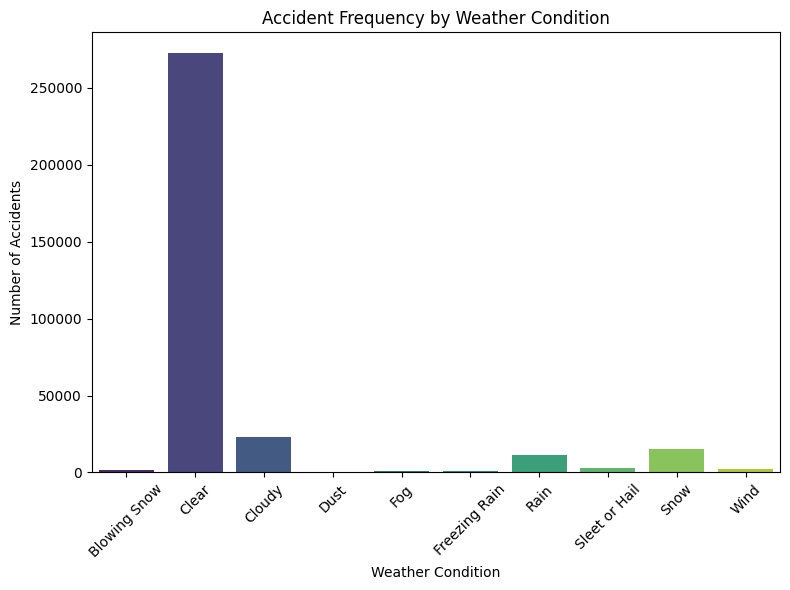

In [5]:
weather_counts = df["Weather Condition"].value_counts().reset_index()
weather_counts.columns = ["Weather Condition", "Number of Accidents"]

# Convert to category type first
weather_counts["Weather Condition"] = weather_counts["Weather Condition"].astype('category')

# Rename category
weather_counts["Weather Condition"] = weather_counts["Weather Condition"].cat.rename_categories(
    {"Freezing Rain or Freezing Drizzle": "Freezing Rain"}
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=weather_counts,
    x="Weather Condition",
    y="Number of Accidents",
    hue="Weather Condition",
    palette="viridis",
    legend=False
)
plt.title("Accident Frequency by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<b>Observations:</b>More Accidents are seen in clear weather and then cloudy followed by snowy.

<h1>Factors Influencing Accident</h1>

In [7]:
df["Alcohol Suspected"] = df["Alcohol Suspected"].map({'Yes': 1, 'No': 0, 'Unknown': 0}).astype('Int64')

In [8]:
df.head()

,System Code,Latitude,Longitude,Road Description,Road Condition,Lighting Conditions,Weather Condition,Alcohol Suspected,Speed Limit Category,Rush Hour,Severity
0,State Highway,39.52549,-107.32253,Intersection Related,Snowy,Daylight,Snow,0,Low,0,slight
1,City Street,39.82885,-105.04402,Non-Intersection,Dry,Dark – Unlighted,Clear,0,Low,0,slight
2,City Street,39.70461,-105.01356,Non-Intersection,Dry,Dark – Unlighted,Clear,0,Low,0,slight
3,City Street,38.81404,-104.78369,Non-Intersection,Icy,Dark – Lighted,Clear,0,Low,0,slight
4,State Highway,37.22388,-107.84457,Non-Intersection,Dry,Dark – Lighted,Clear,1,Medium,0,serious


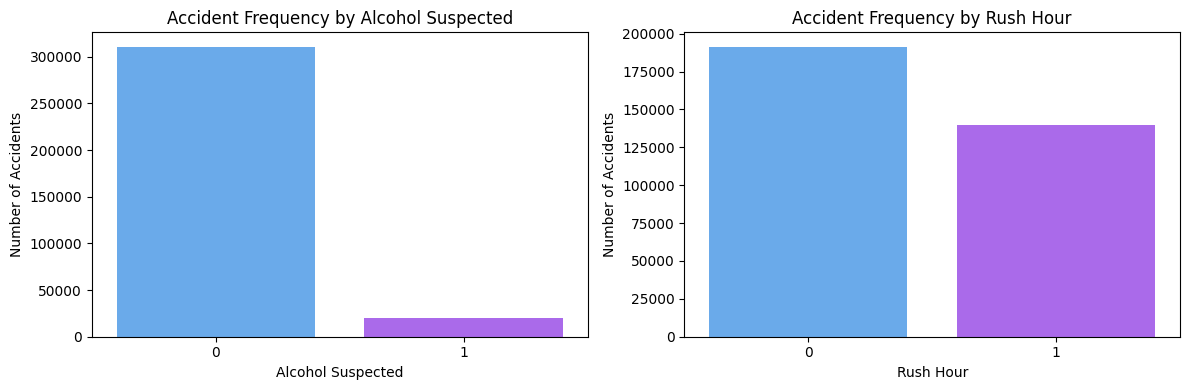

In [12]:
binary_factors = ["Alcohol Suspected", "Rush Hour"]

plt.figure(figsize=(12, 4))

for i, factor in enumerate(binary_factors, 1):
    plt.subplot(1, 2, i)

    # Convert to string to avoid issues with boolean or mixed types
    df[factor] = df[factor].astype(str)

    # Count occurrences
    factor_counts = df[factor].value_counts().sort_index()

    # Plot
    sns.barplot(x=factor_counts.index, y=factor_counts.values, hue=factor_counts.index, palette="cool", legend=False)

    plt.title(f"Accident Frequency by {factor}")
    plt.xlabel(factor)
    plt.ylabel("Number of Accidents")

plt.tight_layout()
plt.show()



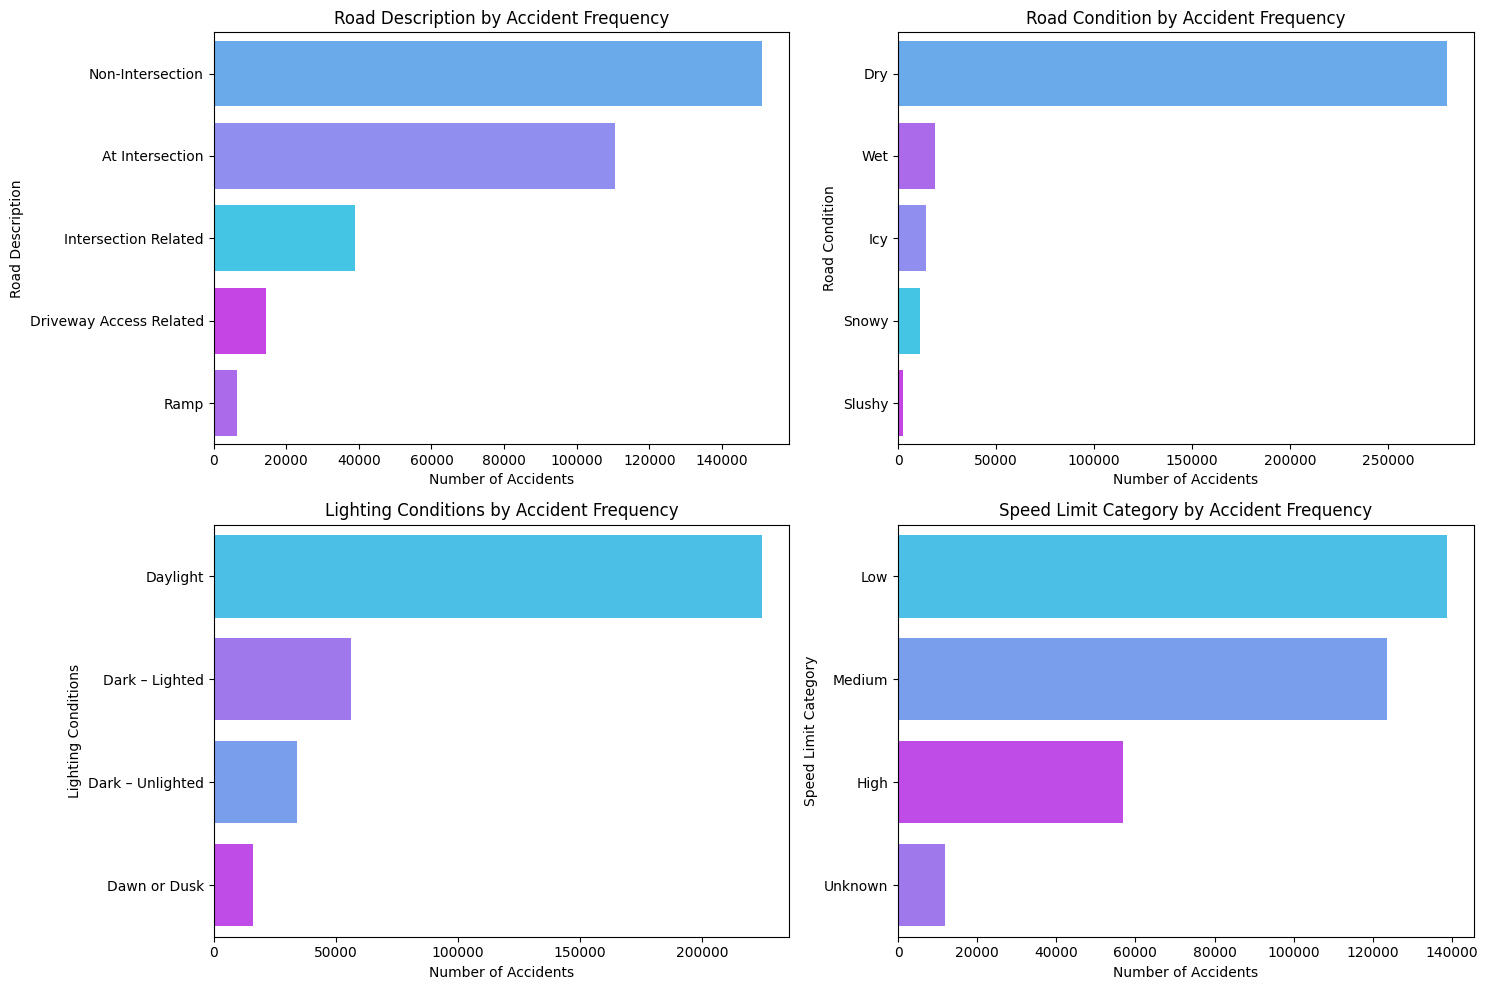

In [13]:
non_binary_factors = ["Road Description", "Road Condition", "Lighting Conditions", "Speed Limit Category"]

plt.figure(figsize=(15, 10))

for i, factor in enumerate(non_binary_factors, 1):
    plt.subplot(2, 2, i)

    # Get top 5 categories
    top_categories = df[factor].value_counts().head(5).index
    filtered_df = df[df[factor].isin(top_categories)]

    # Plot frequency of top categories
    sns.countplot(data=filtered_df, y=factor, order=top_categories, hue=factor, palette="cool", legend=False)

    plt.title(f"{factor} by Accident Frequency")
    plt.xlabel("Number of Accidents")
    plt.ylabel(factor)

plt.tight_layout()
plt.show()


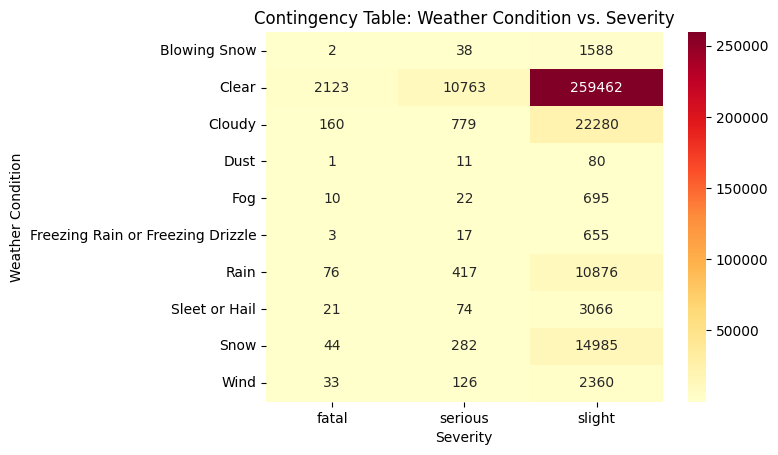

In [16]:
contingency_table = pd.crosstab(df["Weather Condition"], df["Severity"])
sns.heatmap(contingency_table, annot=True, cmap="YlOrRd", fmt="d")
plt.title("Contingency Table: Weather Condition vs. Severity")
plt.show()

* We can see small accidents are happening during clear, cloudy, rainy, snowy weather
* serious accidents are happening during clear weather
* fatal accidents are also happening during clear weather